# **Tugas Besar Wawasan Global TIK**

> **Analisis Sentimen Kebijakan Pemerintah Mengenai Vaksin COVID-19 Di Indonesia Menggunakan Metode Naive Bayes Classifier Pada Sosial Media Twitter**



**Oleh Kelompok 152 :**
1. Fadhlurrahman Akbar Nasution (1301194258) / IF-42-GAB01
2. Firdaus Putra Kurniyanto (1301190385) / IF-42-GAB01
3. Ignasius Nindra Karisma Forestyanto  (1301194138)  / IF-42-GAB02
4. Kurniadi Ahmad Wijaya (1301194024) / IF-42-GAB01
5. Priyan Fadhil Supriyadi (1301190442) / IF-42-GAB01


**Penjelasan Projek :**

Adapun pada penelitian menekankan kepada sentimen masyarakat terhadap kebijakan pemerintah mengenai vaksin COVID-19. Proses analisisnya akan dilakukan berdasarkan tweet yang menyertakan tagar vaksin dan pencarian di twitter dengan keyword vaksin covid 19.




# **Tweet Crawling**

Mengambil Data Dari Post Tweet Dari Twitter Menggunakan API Twitter
Data Yang Diambil Berkisar Dari Tanggal 15-24 Desember dengan proses fetch manual karena limit pengambilan data tweeter sehingga pada akhirnya  Row 8000+ Tweet.


In [1]:
pip install tweepy

In [2]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import re
import time

In [19]:
access_token = "1339862432500498433-bWl7UFBHqQTdKCIbj0GavDCIsnHHeT"
access_token_secret ="vmP6Eb1WBGIwaGiRUHCLo69OwEzKVbcQOp6iMXBuw99aF"
consumer_key ="PodLGfK2ky8VbG1mFpEKOFLTQ"
consumer_secret="0QocN2CdV41mCdUEd5VWxpMjNB4UqCFE0hG6zPwmVOTEuCcf7f"

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def scraptweets(search_words, date_since, date_until, numTweets):

    db_tweets = pd.DataFrame(columns=[
                                      'username', 'acctdesc', 'location', 'following',
                                      'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                      'retweetcount', 'text', 'hashtags', 'followers',
                                     ])
    program_start = time.time()

    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items()

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        acctdesc = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        usercreatedts = tweet.user.created_at
        tweetcreatedts = tweet.created_at
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        ith_tweet = [
                        username, acctdesc, location, following, followers, totaltweets,
                        usercreatedts, tweetcreatedts, retweetcount, text, hashtags
                    ]

        db_tweets.loc[len(db_tweets)] = ith_tweet

    filename = 'covid_vaccine_tweets.csv'
    db_tweets.to_csv(filename, index=False)
    program_end = time.time()
    print('Scraping has completed!')
    print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))


search_words = "#vaksin OR #vaksincovid19 OR #vaksincovid OR #VaksinUntukKita OR #vaksingratis"
date_since = "2020-12-23"
date_until = "2020-12-24"
numTweets = 3000

scraptweets(search_words, date_since, date_until, numTweets)

# **Wrangling Data**

In [11]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud

In [12]:
import preprocessor as p
from textblob import TextBlob

In [13]:
data = pd.read_csv('https://github.com/ShinyQ/Analisis-Sentimen-Kebijakan-COVID-19_Tugas-Besar-Wawasan-Global-TIK/raw/main/Dataset_Covid_Twitter_Raw.csv')

In [14]:
data.head()

,username,acctdesc,location,following,totaltweets,usercreatedts,tweetcreatedts,retweetcount,followers,text,hashtags
0,FatihReborn,Perjuangan masih panjang semoga istiqomah,NaN,54,10,773,12/5/2020 14:27,12/20/2020 16:22,12,Sehatnya rakyat Indonesia tentu harus mencakup...,[]
1,dizyyyyyyyyyy,apa aja deh,NaN,53,13,263,4/26/2019 14:27,12/20/2020 16:12,216,Sama seperti kita yang ingin pandemi segera be...,[]
2,ilupyusayanggg,Masih banyak dosa tp ada peluang masuk surga,"Surakarta, Jawa Tengah",410,770,30969,2/11/2011 9:00,12/20/2020 15:59,41,"Dengan dukung satu sama lain, masa-masa sepert...",[]
3,PMRLangkawi1,Pusat Maklumat Rakyat Langkawi\nPejabat Penera...,"Langkawi, Kedah",987,329,16864,3/25/2020 16:06,12/20/2020 15:58,63,Lindungi orang yang kita sayang dengan vaksin....,"[{'text': 'KomunikasiKita', 'indices': [65, 80..."
4,anas_erindra,🇮🇩 ꧋ꦥꦶꦱ꧀ꦭꦺꦴꦥ꦳꧀ꦲꦥ꧀ꦥꦶꦤꦼꦱ꧀꧈ |je m'appelle Anas |i...,Solo - Indonesia,443,744,257302,8/13/2010 6:11,12/20/2020 15:55,1,Pakar kesehatan masyarakat mengingatkan vaksin...,[]


In [15]:
data.drop(['hashtags', 'totaltweets', 'usercreatedts', 'location', 'followers', 'following', 'acctdesc', 'retweetcount'], axis=1, inplace=True)

In [16]:
data.head()

,username,tweetcreatedts,text
0,FatihReborn,12/5/2020 14:27,Sehatnya rakyat Indonesia tentu harus mencakup...
1,dizyyyyyyyyyy,4/26/2019 14:27,Sama seperti kita yang ingin pandemi segera be...
2,ilupyusayanggg,2/11/2011 9:00,"Dengan dukung satu sama lain, masa-masa sepert..."
3,PMRLangkawi1,3/25/2020 16:06,Lindungi orang yang kita sayang dengan vaksin....
4,anas_erindra,8/13/2010 6:11,Pakar kesehatan masyarakat mengingatkan vaksin...


In [17]:
data.isnull().sum()

username          0
tweetcreatedts    0
text              0
dtype: int64

In [18]:
p.set_options(p.OPT.URL, p.OPT.EMOJI)

def clean_data(x):
    return p.clean(x)

def clean_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(clean_data)
data['tweet_clean'] = data['tweet_clean'].apply(clean_data)

In [19]:
data = data.drop_duplicates()

# **Menerjemahkan Tweat Clean Ke Bahasa Inggris**

In [20]:
pip install google_trans_new

In [ ]:
from google_trans_new import google_translator  
translator = google_translator()  

def convert_eng(tweet):
    return translator.translate(tweet,lang_tgt='en') 

data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

# **Melakukan Modeling Data Untuk Analisis Sentimen**

In [120]:
data = pd.read_csv('https://github.com/ShinyQ/Analisis-Sentimen-Kebijakan-COVID-19_Tugas-Besar-Wawasan-Global-TIK/raw/main/Tweet_Covid_English_Wrangled.csv')

In [121]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'Positif'
    elif polaritas > 0.0 == 0.0:
        return 'Netral'
    else:
        return 'Negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 1485
Netral = 1009
Negatif = 169

Total Data : 2663


In [122]:
status = pd.DataFrame({'klasifikasi': status})

In [123]:
data['klasifikasi'] = status

In [124]:
data.tail()

,username,tweetcreatedts,text,tweet_pre,tweet_clean,tweet_english,klasifikasi
2658,meno_wae,9/25/2020 3:42,Keputusan terbaik Pak Presiden untuk Rakyat In...,Keputusan terbaik Pak Presiden untuk Rakyat In...,Keputusan terbaik Pak Presiden untuk Rakyat In...,The President's best decision for the Indonesi...,Positif
2659,TitikTerangNews,11/7/2019 10:32,Tiga vaksin COVID-19 yang dibandingkan: Pfizer...,Tiga vaksin COVID-19 yang dibandingkan: Pfizer...,Tiga vaksin COVID-19 yang dibandingkan: Pfizer...,Three COVID-19 vaccines compared: Pfizer-BioNT...,Netral
2660,ArifBijaak,8/21/2020 2:15,Alhamdulilah Vaksin Gratis..!!\n\n#lawancovid1...,Alhamdulilah Vaksin Gratis..!!,Alhamdulilah Vaksin Gratis..!!,Alhamdulillah Free Vaccine .. !!,Positif
2661,meno_wae,9/25/2020 3:42,Alhamdulilah Vaksin Gratis..!!\n\n#lawancovid1...,Alhamdulilah Vaksin Gratis..!!,Alhamdulilah Vaksin Gratis..!!,Alhamdulillah Free Vaccine .. !!,Positif
2662,PotekantropusX,12/10/2016 4:59,"Jokowi: Vaksinasi Covid-19 Gratis, Dilakukan M...","Jokowi: Vaksinasi Covid-19 Gratis, Dilakukan M...","Jokowi: Vaksinasi Covid-19 Gratis, Dilakukan M...","Jokowi: Free Covid-19 Vaccination, Started in ...",Positif


In [96]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

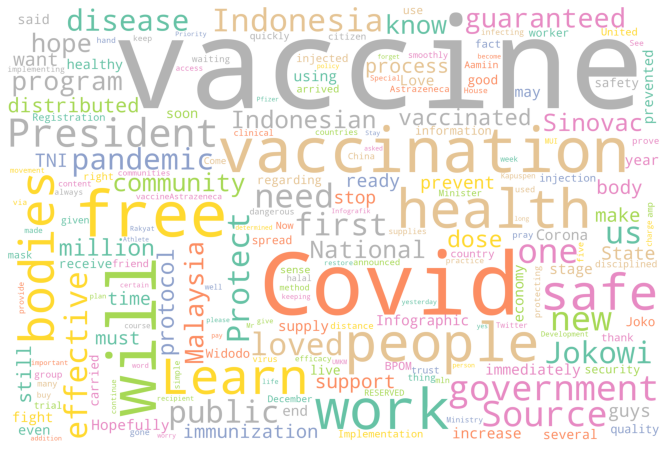

In [97]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

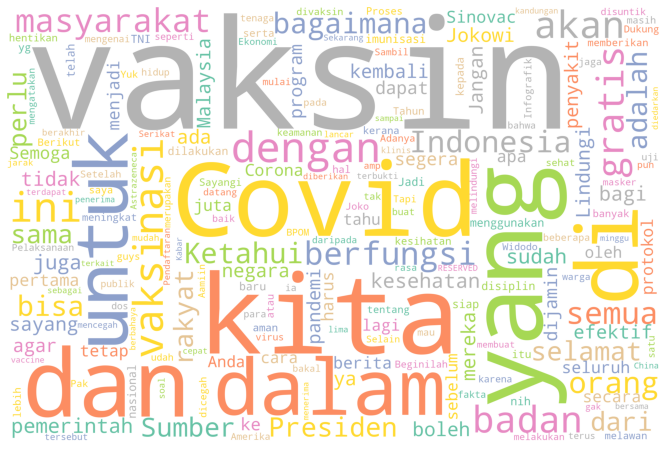

In [98]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [99]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

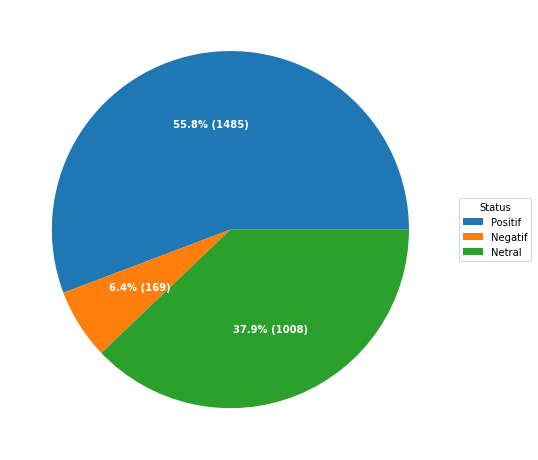

In [100]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

**Kesimpulan :** Masyarakat Menanggapi Positif Adanya Kebijakan Vaksinasi COVID-19

# **Naive Bayes Classifier**

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

In [129]:
dataset = data.drop(['username',	'tweetcreatedts',	'text',	'tweet_pre', 'tweet_clean'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

train = np.random.choice(len(dataset), 500)
train_set = []

for n in train:
    train_set.append(dataset[n])

In [130]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.8313931656027037


In [134]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 1646
Netral = 975
Negatif = 42

Total Data : 2663


In [135]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

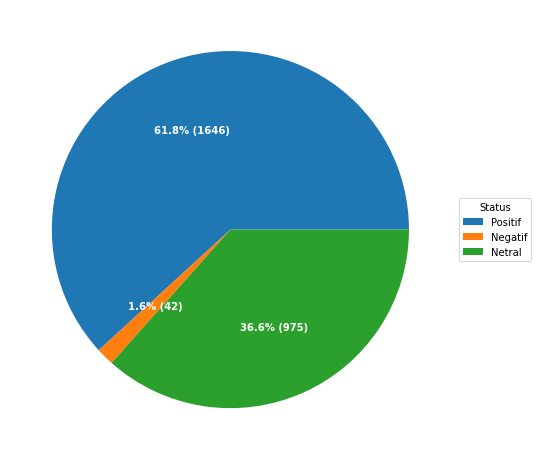

In [138]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")